<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.919328436516 test Score 0.880048826209
Estimators =  50 Train Score 0.925598885502 test Score 0.901259737751
Estimators =  100 Train Score 0.926159009859 test Score 0.921724094302
Estimators =  250 Train Score 0.924602259626 test Score 0.921053186331
Estimators =  450 Train Score 0.92499737973 test Score 0.921409899654


Text(0.5,1,'Estimators vs score at depth of 5')

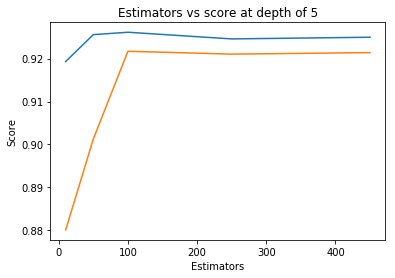

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.889166314008 test Score 0.866057509094
depth =  9 Train Score 0.954336449938 test Score 0.924656379121
depth =  11 Train Score 0.961777669201 test Score 0.926526054068
depth =  15 Train Score 0.964247240798 test Score 0.926852905237
depth =  20 Train Score 0.965591441505 test Score 0.927756493917
depth =  35 Train Score 0.965745430187 test Score 0.92796396093
depth =  50 Train Score 0.965745430187 test Score 0.92796396093
depth =  70 Train Score 0.965745430187 test Score 0.92796396093
depth =  130 Train Score 0.965745430187 test Score 0.92796396093


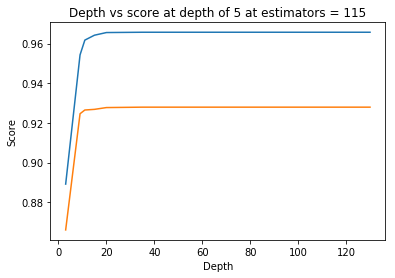

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])


mean test scores [ 0.96299194  0.96282221  0.96104384  0.96223757  0.96472421]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [10]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.966912958753
Test f1 score 0.928314128626


In [38]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


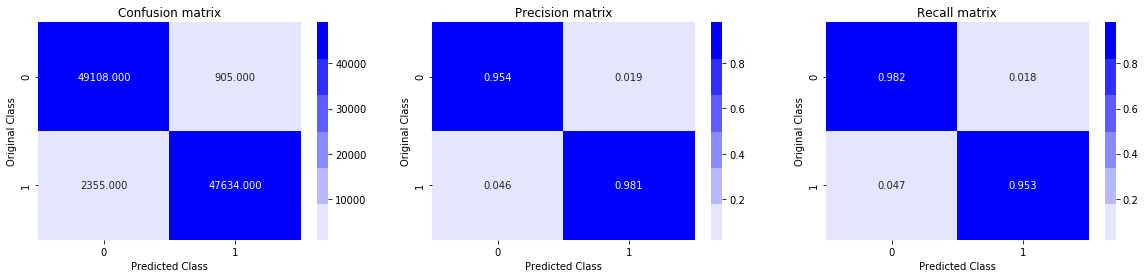

Test confusion_matrix


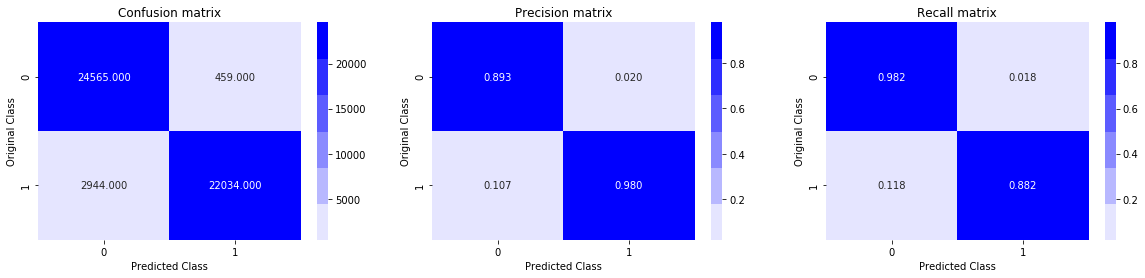

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

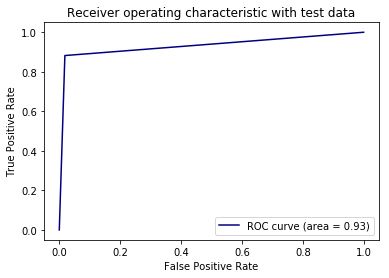

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

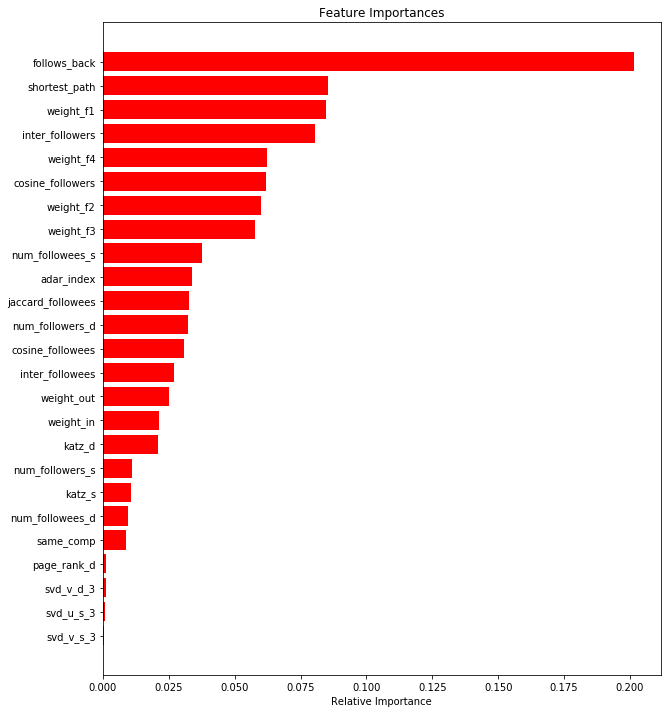

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Preferential Attachment Feature

In [17]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,...,1.983705e-06,1.545077e-13,8.108427e-13,1.719701e-14,-1.355366e-12,4.675306e-13,1.128588e-06,6.616654e-14,9.771068e-13,4.160009e-14
1,0,0.407407,0.169548,0.582182,29,23,21,17,21,11,...,7.757241e-20,-2.357495e-19,-1.603849e-19,5.689671e-21,1.274447e-19,-6.288189e-20,5.755000e-20,-2.025439e-19,-1.265326e-19,2.334478e-21
2,0,0.187500,0.134164,0.327327,5,10,7,12,3,3,...,3.989004e-11,6.951261e-14,2.528174e-14,4.889795e-14,-1.195007e-12,3.169914e-13,9.242597e-11,1.221675e-12,2.639144e-11,1.016047e-13
3,0,0.000000,0.000000,0.000000,8,13,15,24,0,0,...,3.460528e-10,2.437044e-13,1.788353e-12,1.488907e-15,-1.645821e-12,1.690582e-11,1.947851e-10,7.582002e-12,1.077090e-11,5.139933e-14
4,0,0.000000,0.050252,0.000000,11,6,12,6,1,0,...,1.390613e-12,9.647552e-12,2.353031e-09,5.623551e-15,-5.094863e-13,6.828593e-13,8.249436e-13,1.336026e-12,2.078939e-09,7.827372e-16


In [18]:
df_final_train['preferential_attachment']=(df_final_train.num_followers_s+df_final_train.num_followees_s)*(df_final_train.num_followers_d+df_final_train.num_followees_d)

In [19]:
df_final_test['preferential_attachment']=(df_final_test.num_followers_s+df_final_test.num_followees_s)*(df_final_test.num_followers_d+df_final_test.num_followees_d)

In [20]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment
0,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,...,1.545077e-13,8.108427e-13,1.719701e-14,-1.355366e-12,4.675306e-13,1.128588e-06,6.616654e-14,9.771068e-13,4.160009e-14,364
1,0,0.407407,0.169548,0.582182,29,23,21,17,21,11,...,-2.357495e-19,-1.603849e-19,5.689671e-21,1.274447e-19,-6.288189e-20,5.755000e-20,-2.025439e-19,-1.265326e-19,2.334478e-21,2000
2,0,0.187500,0.134164,0.327327,5,10,7,12,3,3,...,6.951261e-14,2.528174e-14,4.889795e-14,-1.195007e-12,3.169914e-13,9.242597e-11,1.221675e-12,2.639144e-11,1.016047e-13,264
3,0,0.000000,0.000000,0.000000,8,13,15,24,0,0,...,2.437044e-13,1.788353e-12,1.488907e-15,-1.645821e-12,1.690582e-11,1.947851e-10,7.582002e-12,1.077090e-11,5.139933e-14,851
4,0,0.000000,0.050252,0.000000,11,6,12,6,1,0,...,9.647552e-12,2.353031e-09,5.623551e-15,-5.094863e-13,6.828593e-13,8.249436e-13,1.336026e-12,2.078939e-09,7.827372e-16,276


# SVD Dot Feature

In [6]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [7]:
df_source_u=df_final_train[['svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6']]
df_source_v=df_final_train[['svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']]

In [8]:
df_source_u.head()

,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6
0,-1.666258e-13,4.613784e-13,1.043043e-05,6.677967e-13,2.451101e-13,3.584945e-12
1,5.215662e-19,-3.950777e-19,2.263040e-19,-9.935141e-19,-8.372973e-19,-3.036075e-21
2,-2.763667e-14,1.546711e-14,7.794755e-11,1.224210e-13,2.867995e-13,2.510558e-15
3,-3.739767e-13,2.132016e-11,3.582238e-09,6.835542e-13,6.151620e-12,3.518049e-15
4,-8.389982e-14,1.167960e-11,2.562356e-12,4.164955e-13,3.833107e-11,2.272218e-15


In [9]:
df_source_v.head()

,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6
0,-7.216117e-13,3.926247e-13,1.983705e-06,1.545077e-13,8.108427e-13,1.719701e-14
1,1.721304e-19,-5.929097e-20,7.757241e-20,-2.357495e-19,-1.603849e-19,5.689671e-21
2,-9.249318e-14,5.366890e-15,3.989004e-11,6.951261e-14,2.528174e-14,4.889795e-14
3,-9.924795e-13,3.509177e-12,3.460528e-10,2.437044e-13,1.788353e-12,1.488907e-15
4,-3.988534e-13,1.119933e-12,1.390613e-12,9.647552e-12,2.353031e-09,5.623551e-15


In [10]:
df_destination_u=df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6']]
df_destination_v=df_final_train[['svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6']]

In [11]:
df_destination_u.head()

,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6
0,-2.038017e-11,5.397877e-13,1.068944e-06,1.192454e-12,2.279485e-12,3.581202e-12
1,4.050035e-19,-4.543848e-19,1.775320e-19,-8.375139e-19,-6.880291e-19,3.535905e-20
2,-9.009384e-12,2.812409e-12,6.959262e-10,1.607962e-10,5.961792e-12,1.400334e-13
3,-2.088991e-11,6.903177e-11,2.692168e-10,8.063429e-12,2.359907e-11,6.084473e-15
4,-4.679923e-14,1.000212e-11,5.831231e-13,1.981892e-13,1.918718e-11,8.503123e-16


In [12]:
df_destination_v.head()

,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,-1.355366e-12,4.675306e-13,1.128588e-06,6.616654e-14,9.771068e-13,4.160009e-14
1,1.274447e-19,-6.288189e-20,5.755000e-20,-2.025439e-19,-1.265326e-19,2.334478e-21
2,-1.195007e-12,3.169914e-13,9.242597e-11,1.221675e-12,2.639144e-11,1.016047e-13
3,-1.645821e-12,1.690582e-11,1.947851e-10,7.582002e-12,1.077090e-11,5.139933e-14
4,-5.094863e-13,6.828593e-13,8.249436e-13,1.336026e-12,2.078939e-09,7.827372e-16


In [15]:
np.dot(df_source_u.values,df_destination_u.values.T) # Showing Memory Error so we have to do it row by row 

MemoryError: 

In [16]:
df_source_u.shape

(100002, 6)

In [17]:
from tqdm import tqdm
svd_dot_u=[]
for i in tqdm(range(100002)):
    source=[]
    destination=[]
    for j in range(6):
        source.append(df_source_u.iloc[i][j])
        destination.append(df_destination_u.iloc[i][j])
    svd_dot_u.append(np.dot(source,destination))

100%|█████████████████████████████████████████████████████████████████████████| 100002/100002 [02:15<00:00, 735.40it/s]


In [18]:
df_final_train['SVD_Dot_U']=svd_dot_u

In [19]:
from tqdm import tqdm
svd_dot_v=[]
for i in tqdm(range(100002)):
    source=[]
    destination=[]
    for j in range(6):
        source.append(df_source_v.iloc[i][j])
        destination.append(df_destination_v.iloc[i][j])
    svd_dot_v.append(np.dot(source,destination))

100%|█████████████████████████████████████████████████████████████████████████| 100002/100002 [02:00<00:00, 828.86it/s]


In [20]:
df_final_train['SVD_Dot_V']=svd_dot_v

In [21]:
df_source_test_u=df_final_test[['svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6']]
df_source_test_v=df_final_test[['svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6']]

df_destination_test_u=df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6']]
df_destination_test_v=df_final_test[['svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6']]

In [22]:
df_source_test_u.shape

(50002, 6)

In [23]:
from tqdm import tqdm
svd_dot_u=[]
for i in tqdm(range(50002)):
    source=[]
    destination=[]
    for j in range(6):
        source.append(df_source_test_u.iloc[i][j])
        destination.append(df_destination_test_u.iloc[i][j])
    svd_dot_u.append(np.dot(source,destination))

100%|███████████████████████████████████████████████████████████████████████████| 50002/50002 [01:01<00:00, 818.34it/s]


In [24]:
df_final_test['SVD_Dot_U']=svd_dot_u

In [25]:
from tqdm import tqdm
svd_dot_v=[]
for i in tqdm(range(50002)):
    source=[]
    destination=[]
    for j in range(6):
        source.append(df_source_test_v.iloc[i][j])
        destination.append(df_destination_test_v.iloc[i][j])
    svd_dot_v.append(np.dot(source,destination))

100%|███████████████████████████████████████████████████████████████████████████| 50002/50002 [01:01<00:00, 810.88it/s]


In [26]:
df_final_test['SVD_Dot_V']=svd_dot_v

In [27]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,SVD_Dot_U,SVD_Dot_V
0,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,...,8.108427e-13,1.719701e-14,-1.355366e-12,4.675306e-13,1.128588e-06,6.616654e-14,9.771068e-13,4.160009e-14,1.114954e-11,2.238786e-12
1,0,0.407407,0.169548,0.582182,29,23,21,17,21,11,...,-1.603849e-19,5.689671e-21,1.274447e-19,-6.288189e-20,5.755000e-20,-2.025439e-19,-1.265326e-19,2.334478e-21,1.838989e-36,9.818655e-38
2,0,0.187500,0.134164,0.327327,5,10,7,12,3,3,...,2.528174e-14,4.889795e-14,-1.195007e-12,3.169914e-13,9.242597e-11,1.221675e-12,2.639144e-11,1.016047e-13,5.426744e-20,3.687745e-21
3,0,0.000000,0.000000,0.000000,8,13,15,24,0,0,...,1.788353e-12,1.488907e-15,-1.645821e-12,1.690582e-11,1.947851e-10,7.582002e-12,1.077090e-11,5.139933e-14,9.660288e-19,6.748798e-20
4,0,0.000000,0.050252,0.000000,11,6,12,6,1,0,...,2.353031e-09,5.623551e-15,-5.094863e-13,6.828593e-13,8.249436e-13,1.336026e-12,2.078939e-09,7.827372e-16,8.538668e-22,4.891822e-18


In [28]:
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,SVD_Dot_U,SVD_Dot_V
0,0,0.000000,0.029161,0.000000,6,14,6,9,1,0,...,4.341619e-13,5.535503e-14,-9.994074e-10,5.791914e-10,3.512362e-07,2.486660e-09,2.771146e-09,1.727695e-12,8.425017e-20,2.074816e-17
1,0,0.125000,0.106600,0.321288,22,2,31,5,1,4,...,2.112207e-11,3.098817e-14,-9.541405e-14,2.107418e-13,2.150839e-11,9.343828e-14,2.076078e-11,2.548702e-14,5.693283e-21,1.432277e-21
2,0,0.000000,0.000000,0.000000,15,7,14,8,0,0,...,2.009009e-13,4.980849e-16,-6.912220e-15,1.304667e-13,1.316441e-12,2.169130e-14,1.832262e-13,4.897869e-16,6.843556e-22,7.817469e-23
3,0,0.045455,0.057378,0.087039,15,9,12,11,2,1,...,5.538798e-10,2.562606e-14,-3.016805e-12,1.931616e-11,1.092595e-11,6.573112e-12,2.253590e-11,2.592157e-12,7.193543e-20,4.909734e-20
4,0,0.500000,0.353553,0.707107,2,4,2,1,2,1,...,2.608046e-15,7.724837e-20,-1.008605e-18,3.583089e-16,2.716545e-15,3.196035e-17,2.608390e-15,7.746406e-20,6.158387e-32,1.430929e-29


# Applying XGBoost

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [30]:
param_grid = {'silent': [False],
        'max_depth': [6, 10, 15, 20],      
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'n_estimators': [100,120,150,160]}
              

In [31]:
model = RandomizedSearchCV(XGBClassifier(), param_distributions=param_grid,
                                   n_iter=5,cv=3,scoring='f1')

In [32]:
model.fit(df_final_train,y_train)


[02:12:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1026 extra nodes, 0 pruned nodes, max_depth=20
[02:12:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2156 extra nodes, 0 pruned nodes, max_depth=20
[02:12:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2192 extra nodes, 0 pruned nodes, max_depth=20
[02:12:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2786 extra nodes, 0 pruned nodes, max_depth=20
[02:12:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1366 extra nodes, 0 pruned nodes, max_depth=20
[02:12:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1460 extra nodes, 0 pruned nodes, max_depth=20
[02:12:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1634 extra nodes, 0 pruned nodes, max_depth=20
[02:12:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2596 extra nodes, 0 pruned nodes, max_depth=20
[02:12:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1694 extra n

[02:13:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=20
[02:13:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=14
[02:13:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=20
[02:13:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=19
[02:13:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=20
[02:13:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=20
[02:13:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=16
[02:13:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=19
[02:13:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 p

[02:14:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 288 extra nodes, 0 pruned nodes, max_depth=19
[02:14:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 290 extra nodes, 0 pruned nodes, max_depth=20
[02:14:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 0 pruned nodes, max_depth=20
[02:14:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=16
[02:14:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=16
[02:14:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=16
[02:14:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=20
[02:14:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 0 pruned nodes, max_depth=17
[02:14:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 p

[02:14:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=20
[02:14:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 0 pruned nodes, max_depth=20
[02:14:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=19
[02:14:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=20
[02:14:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=19
[02:14:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=16
[02:14:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=20
[02:14:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=20
[02:14:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 p

[02:15:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 54 pruned nodes, max_depth=15
[02:15:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 66 pruned nodes, max_depth=15
[02:15:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 42 pruned nodes, max_depth=15
[02:15:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 80 pruned nodes, max_depth=15
[02:15:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 86 pruned nodes, max_depth=15
[02:15:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 52 pruned nodes, max_depth=15
[02:15:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 80 pruned nodes, max_depth=15
[02:15:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 76 pruned nodes, max_depth=15
[02:15:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra no

[02:15:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 26 pruned nodes, max_depth=15
[02:15:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 24 pruned nodes, max_depth=15
[02:15:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 18 pruned nodes, max_depth=15
[02:15:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 60 pruned nodes, max_depth=15
[02:15:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 52 pruned nodes, max_depth=15
[02:15:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 28 pruned nodes, max_depth=15
[02:15:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 40 pruned nodes, max_depth=15
[02:15:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 46 pruned nodes, max_depth=15
[02:15:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra no

[02:16:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 24 pruned nodes, max_depth=15
[02:16:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 40 pruned nodes, max_depth=15
[02:16:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 36 pruned nodes, max_depth=15
[02:16:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 10 pruned nodes, max_depth=15
[02:16:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 52 pruned nodes, max_depth=15
[02:16:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 14 pruned nodes, max_depth=15
[02:16:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 26 pruned nodes, max_depth=15
[02:16:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 40 pruned nodes, max_depth=15
[02:16:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra no

[02:16:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[02:16:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[02:16:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[02:16:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[02:16:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[02:16:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[02:16:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[02:16:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[02:16:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_

[02:17:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[02:17:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[02:17:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[02:17:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[02:17:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[02:17:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[02:17:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[02:17:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[02:17:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max

[02:17:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=6
[02:17:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=6
[02:17:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[02:17:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 6 pruned nodes, max_depth=6
[02:17:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=6
[02:17:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[02:17:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[02:17:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[02:17:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_

[02:17:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[02:17:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 6 pruned nodes, max_depth=6
[02:17:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 2 pruned nodes, max_depth=6
[02:17:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=6
[02:17:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[02:17:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 2 pruned nodes, max_depth=6
[02:17:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=6
[02:17:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[02:17:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_

[02:18:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 14 pruned nodes, max_depth=6
[02:18:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 6 pruned nodes, max_depth=6
[02:18:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 8 pruned nodes, max_depth=6
[02:18:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[02:18:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[02:18:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[02:18:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[02:18:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[02:18:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max

[02:18:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 8 pruned nodes, max_depth=6
[02:18:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 4 pruned nodes, max_depth=6
[02:18:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 12 pruned nodes, max_depth=6
[02:18:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 12 pruned nodes, max_depth=6
[02:18:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 6 pruned nodes, max_depth=6
[02:18:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 8 pruned nodes, max_depth=6
[02:18:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=6
[02:18:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 6 pruned nodes, max_depth=6
[02:18:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 14 pruned nodes, m

[02:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 54 pruned nodes, max_depth=10
[02:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 84 pruned nodes, max_depth=10
[02:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 96 pruned nodes, max_depth=10
[02:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 36 pruned nodes, max_depth=10
[02:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 54 pruned nodes, max_depth=10
[02:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 46 pruned nodes, max_depth=10
[02:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 100 pruned nodes, max_depth=10
[02:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 80 pruned nodes, max_depth=10
[02:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes

[02:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 32 pruned nodes, max_depth=10
[02:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 34 pruned nodes, max_depth=10
[02:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 66 pruned nodes, max_depth=10
[02:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 54 pruned nodes, max_depth=10
[02:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 54 pruned nodes, max_depth=10
[02:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 44 pruned nodes, max_depth=10
[02:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 62 pruned nodes, max_depth=10
[02:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 30 pruned nodes, max_depth=10
[02:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes,

[02:20:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 104 pruned nodes, max_depth=10
[02:20:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 22 pruned nodes, max_depth=10
[02:20:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 56 pruned nodes, max_depth=10
[02:20:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 40 pruned nodes, max_depth=10
[02:20:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 34 pruned nodes, max_depth=10
[02:20:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 74 pruned nodes, max_depth=10
[02:20:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 36 pruned nodes, max_depth=10
[02:20:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 58 pruned nodes, max_depth=10
[02:21:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nod

[02:22:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 40 pruned nodes, max_depth=10
[02:22:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 58 pruned nodes, max_depth=10
[02:22:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 14 pruned nodes, max_depth=10
[02:22:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 72 pruned nodes, max_depth=10
[02:22:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 68 pruned nodes, max_depth=10
[02:22:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 24 pruned nodes, max_depth=10
[02:22:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 12 pruned nodes, max_depth=10
[02:22:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 28 pruned nodes, max_depth=10
[02:22:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra node

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale...
                   iid='warn', n_iter=5, n_jobs=None,
                   param_distributions={'colsample_bylevel': [0.4, 0.5, 0.6,
                                                              0.7, 0.8, 0.9,
             

In [33]:
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bytree=0.9, gamma=1.0, learning_rate=0.1,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
              n_estimators=150, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
              subsample=1)


In [34]:
clf=model.best_estimator_

In [35]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

[02:22:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 20 pruned nodes, max_depth=10
[02:22:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 8 pruned nodes, max_depth=10
[02:22:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 14 pruned nodes, max_depth=10
[02:22:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 6 pruned nodes, max_depth=10
[02:22:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 18 pruned nodes, max_depth=10
[02:22:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 20 pruned nodes, max_depth=10
[02:22:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 22 pruned nodes, max_depth=10
[02:22:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 14 pruned nodes, max_depth=10
[02:22:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra node

[02:24:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 78 pruned nodes, max_depth=10
[02:24:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 68 pruned nodes, max_depth=10
[02:24:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 58 pruned nodes, max_depth=10
[02:24:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 30 pruned nodes, max_depth=10
[02:24:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 98 pruned nodes, max_depth=10
[02:24:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 76 pruned nodes, max_depth=10
[02:24:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 extra nodes, 66 pruned nodes, max_depth=10
[02:24:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 98 pruned nodes, max_depth=10


In [36]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.996942202617
Test f1 score 0.930134056206


Train confusion_matrix


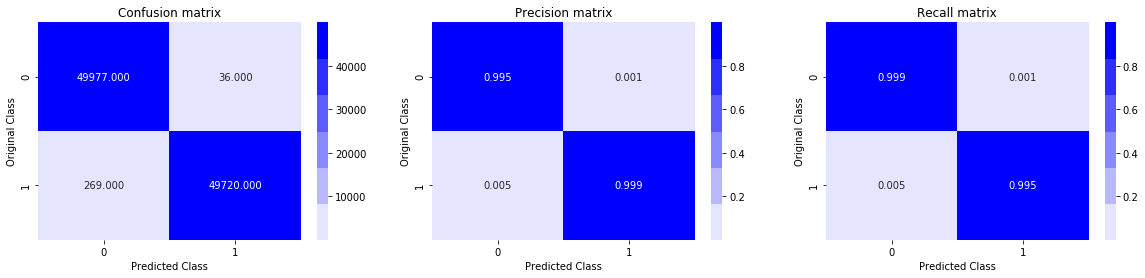

Test confusion_matrix


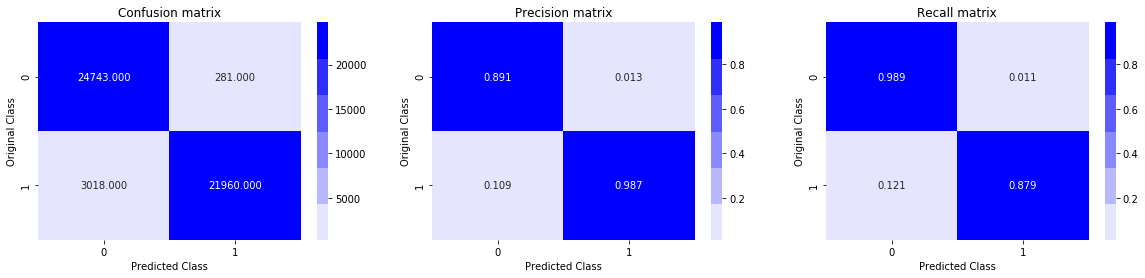

In [39]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

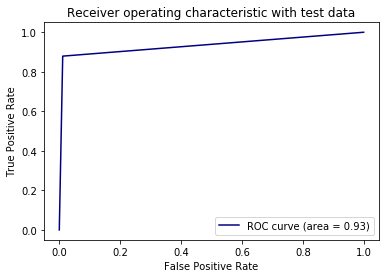

In [40]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

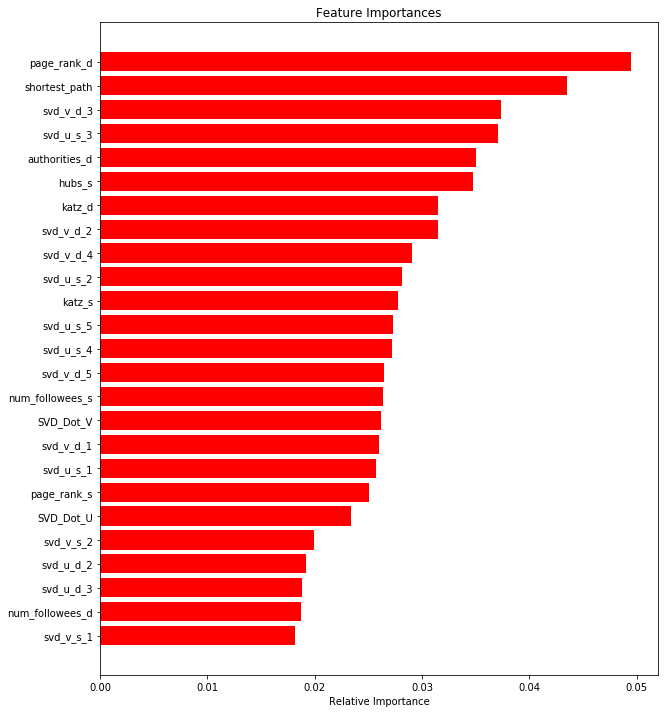

In [41]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "Model","max_depth",'n_estimators','Training_F1_Score','Testing_F1_Score']


In [43]:
x.add_row(['Random_Forest',14,121,0.966,0.928])
x.add_row(['XG_Boost',10,150,0.996,0.930])

In [44]:
print(x)

+---------------+-----------+--------------+-------------------+------------------+
|     Model     | max_depth | n_estimators | Training_F1_Score | Testing_F1_Score |
+---------------+-----------+--------------+-------------------+------------------+
| Random_Forest |     14    |     121      |       0.966       |      0.928       |
|    XG_Boost   |     10    |     150      |       0.996       |       0.93       |
+---------------+-----------+--------------+-------------------+------------------+


# Conclusion

* Firstly we posed this dataset as classification problem by creating labels as 1 and 0
* As the data was given in the form of nodes source and destination so we created some new features like jaccard distance,adar index ,page rank etc
* Then we trained our model using Random Forest with best hyper parameters and got the training f1_score 0.966 and testing f1 score 0.928 which is good as it is not overfitting nor underfitting
* we also trained our model using XG Boost from which we got training f1 score .930 and testing score .929 which shows some overfitting as training f1 score is nearly 1 
* Some of the best features are page rank,follows back,shortest path 